# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [157]:
# Carregamento dos pacotes necessários
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

A base utilizada nesta primeira parte do exercício é a de gorjetas, nomeada "tips", na qual encontram-se as seguintes variáveis:

| Variavel | Descrição|
|-|-|
|total_bill| valor total da conta paga pelo cliente | 
|tip| valor da gorjeta que o cliente pagou |
|sex| gênero do garçom (garçonete) que atendeu o cliente e recebeu a gorjeta |
|smoker| informa se o cliente estava na área de fumantes |
|day| dia da semana em que a refeição foi realizada |
|time| tipo de refeição (almoço, janta, etc) |
|size| quantidade de pessoas na mesa

In [158]:
# Carregamento da base de gorjetas e visualização dela
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Com os dados da base, vamos criar as variáveis "net_bill" que informa qual foi o valor líquido da conta do cliente, e "tip_pct" que é a porcentagem do valor da refeição que foi convertido em gorjeta.

In [159]:
# Criação das variáveis 'net_bill' e 'tip_pct', e visualizando a base modificada
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / tips['net_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.172069


Tendo carregado a base, vamos criar a matriz de design e a matriz y para um modelo em tip, explicada por sex, smoker, diner e net_bill.

In [160]:
# Criação das matrizes de design e y
y_tip, X_tip = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)

In [161]:
# Visualização da matriz de design
X_tip

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [162]:
# Visualização da matriz y 
y_tip

DesignMatrix with shape (244, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  4.71
  2.00
  3.12
  1.96
  3.23
  1.71
  5.00
  1.57
  3.00
  3.02
  3.92
  1.67
  3.71
  3.50
  3.35
  4.08
  2.75
  2.23
  7.58
  3.18
  2.34
  2.00
  2.00
  4.30
  3.00
  [214 rows omitted]
  Terms:
    'tip' (column 0)
  (to view full data, use np.asarray(this_obj))

Em posse das duas matrizes, vamos fazer um modelo linear entre tip e as variáveis explicativas.

In [163]:
# Aplicação do modelo
mod_tip = sm.OLS(y_tip, X_tip).fit()

# Resultados do modelo
mod_tip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           2.64e-20
Time:                        18:34:43   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observando os resultados, vemos que algumas das variáveis não são significantes para o modelo, principalmente devido ao valor P>|t|, que identifica uma variável não significativa quando ele é superior a 0.5. No caso, podemos remover as variáveis 'sex' e 'time'. 

In [164]:
# Remoção das variáveis não significativas
tip_melhor = smf.ols('tip ~ smoker + net_bill', tips).fit()

# Resultado do modelo
tip_melhor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           4.56e-22
Time:                        18:34:43   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comparando os resultados nos dois casos (com e sem variáveis não significativas), nota-se que não houve alteração no R², mostrando que a presença de tais variáveis não interfere no ajuste. 

Agora, vamos observar o gráfico de resíduos do ajuste. Para isso, tomemos os respectivos resíduos.

In [165]:
# Tomada dos resíduos do ajuste
tips['res_tip'] = tip_melhor.resid

Agora, montemos o gráfico dos resíduos em função da variável 'net_bill'.

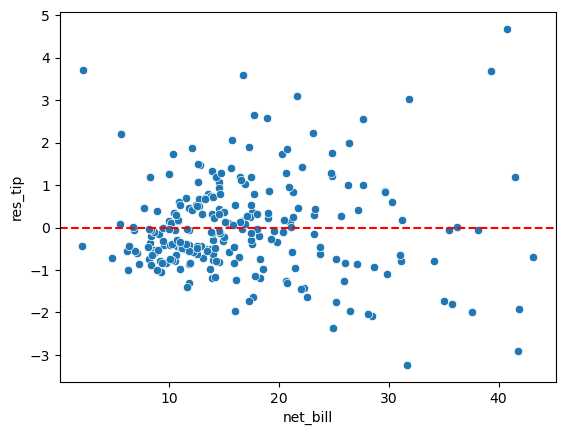

In [166]:
# Gráfico dos resíduos em função da variável 'net_bill'
sns.scatterplot(x = 'net_bill', y = 'res_tip', data = tips)

# Reta tracejada em y = 0 no gráfico 
plt.axhline(y=0, color='r', linestyle='--')

Analisando o gráfico, vemos que há uma maior concentração de resíduos na região em que 10 < 'net_bill' < 20 e que há um maior espalhamento entre eles nas regiões seguintes. Dado que em um gráfico ideal há três fatores a serem atendidos (nenhum padrão evidente nos resíduos, aspecto de indepêndencia e variância uniforme), o gráfico obtido mostra que o ajuste pode ser melhorado.

Para melhorar o ajuste, tomemos dois novos modelos, um em que é analisado a variável resposta em função do logaritmo da variável explicativa 'net_bil'; e outro em que é tomado um polinômio de 'net_bill'.

Começando pelo logaritmo.

In [167]:
# Ajuste do modelo de 'tip' em função das variáveis 'smoker' e log('net_bill')
tip_log = smf.ols('tip ~ smoker + np.log(net_bill)', tips).fit()

# Resultados do ajuste
tip_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           5.38e-19
Time:                        18:34:43   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2890      0.445     -2.896      0.004      -2.166      -0.412
smoker[T.No]         0.0433      0.154      0.282      0.779      -0.260       0.347
np.log(net_bill)     1.5712      0.157     10.034      0.000       1.263       1.880
==============================================================================
Omnibus:                       75.168   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.823
Skew:                           1.320   Prob(JB):                     3.38e-50
Kurtosis:                       6.929   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A variável 'smoker' apresentou um valor P>|t| muito grande (0.78), de forma que ela seja uma variável não significativa no ajute. Vamos removê-la e observar o resultado.

In [168]:
# Ajuste de 'tip' em função de 'log(net_bill)'
tip_log = smf.ols('tip ~ np.log(net_bill)', tips).fit()

# Resultados do ajuste
tip_log.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           4.40e-20
Time:                        18:34:43   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430     -2.924      0.004      -2.104      -0.410
np.log(net_bill)     1.5695      0.156     10.049      0.000       1.262       1.877
==============================================================================
Omnibus:                       73.945   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.148
Skew:                           1.303   Prob(JB):                     9.51e-49
Kurtosis:                       6.868   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Houve uma leve queda no R² (foi de 0.295 para 0.294) com a remoção da variável 'smoker'. Isto é natural com a remoção de variáveis do ajuste em geral. Entretanto, observa-se que o R²-ajustado aumentou (foi de 0.289 para 0.292), implicando melhora no ajuste. 

Vejamos se houve alterações no gráfico de resíduos:

In [169]:
# Obtenção dos resíduos do ajuste logarítmico
tips['res_tip_log'] = tip_log.resid

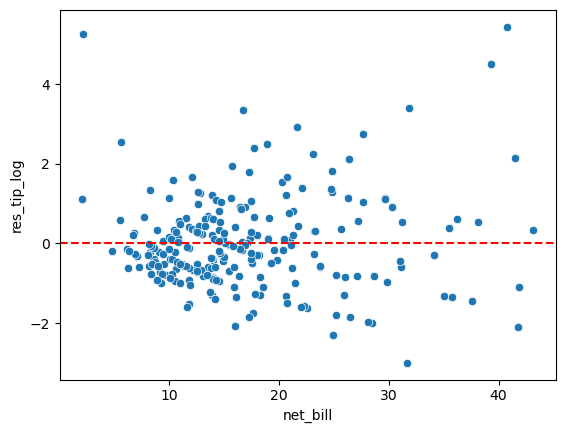

In [170]:
# Formação do gráfico de resíduos com uma reta em y = 0
sns.scatterplot(x = 'net_bill', y = 'res_tip_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

Com excessão da diminuição no intervalo de distribuição dos resíduos, não são notadas mudanças no gráfico ao compará-lo com o inicial.

Tendo analisado o ajuste do modelo de 'tip' em função do log('net_bill'), vejamos o caso em que 'tip' depende de um polinômio de 'net_bill'.

In [171]:
# Ajuste com polinômio de 'net_bill' e seus resultados
tip_pol = smf.ols('tip ~ net_bill + np.power(net_bill,2)', tips).fit()
tip_pol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           4.96e-22
Time:                        18:34:43   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0743      0.353      3.039      0.003       0.378       1.770
net_bill                  0.1288      0.037      3.493      0.001       0.056       0.202
np.power(net_bill, 2)    -0.0007      0.001     -0.825      0.410      -0.002       0.001
==============================================================================
Omnibus:                       39.745   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.849
Skew:                           0.830   Prob(JB):                     1.25e-17
Kurtosis:                       5.214   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O R² deste ajuste é muito superior ao do modelo logarítmico, sendo, praticamente, o mesmo valor do R² do ajuste linear inicial. Dessa forma, o modelo polinomial é bem mais adequado quando comparado ao logarítmico. 

Verifiquemos o gráfico de resíduos.

In [172]:
# Tomada dos resíduos do ajuste polinomial
tips['res_tip_pol'] = tip_pol.resid

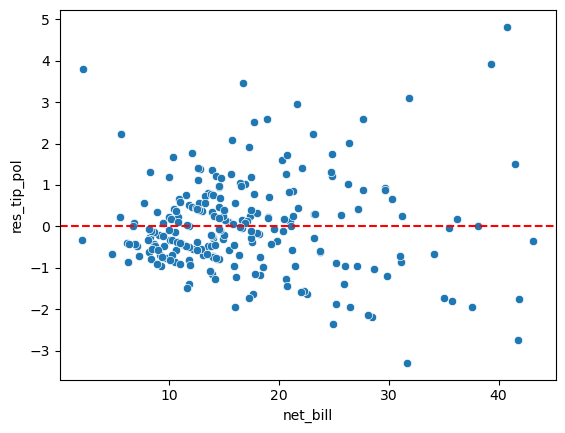

In [173]:
# Gráfico dos resíduos em função da 'net_bill' com uma reta em y = 0
sns.scatterplot(x = 'net_bill', y = 'res_tip_pol', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

Novamente, a única variação é no intervalo dos resíduos, sendo superior ao do ajuste logarítmico. Com exceção disso, não são notadas alterações no gráfico.

Comparando os resultados destes dois últimos ajustes, verifica-se que o coeficiente de determinação do modelo polinomial é superior ao modelo logarítmico, implicando que o modelo polinomial é o mais adequado aos dados utilizados. Entretanto, ao comparar os resultados dos três modelos e considerando a última casa decimal dos R², vemos que o ajuste linear é mais condizente do que o polinomial.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

Para criar um modelo no logaritmo da variável 'tip' explicada pelas variáveis 'sex', 'smoker', 'time' e 'net_bill',  vamos fazer procedimentos análogos aos realizados no exercício I.

In [174]:
# Criação das matrizes de design e y
y_log, X_log = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', tips)

In [175]:
# Ajuste do modelo de log(tip) em função das variáveis 'sex', 'smoker', 'time' e 'net_bill'
mod_log = sm.OLS(y_log, X_log).fit()
mod_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           1.21e-18
Time:                        18:34:43   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Novamente, as únicas variáveis significativas são 'net_bill' e 'smoker'. Vamos remover as restantes.

In [176]:
# Melhora no ajuste com remoção das variáveis não significativas e seus resultados
log_melhor = smf.ols('np.log(tip) ~ smoker + net_bill', tips).fit()
log_melhor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     54.87
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           2.31e-20
Time:                        18:34:43   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             201.0
Df Residuals:                     241   BIC:                             211.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4639      0.064      7.254      0.000       0.338       0.590
smoker[T.No]     0.0429      0.048      0.892      0.373      -0.052       0.138
net_bill         0.0305      0.003     10.475      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.309   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.966
Skew:                          -0.169   Prob(JB):                        0.374
Kurtosis:                       3.282   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Foi notado um pequeno aumento no R²-ajustado, implicando uma melhor adequação do modelo.

Desenvolvendo o gráfico de resíduos.

In [177]:
# Tomada dos resíduos do ajuste
tips['res_log'] = log_melhor.resid

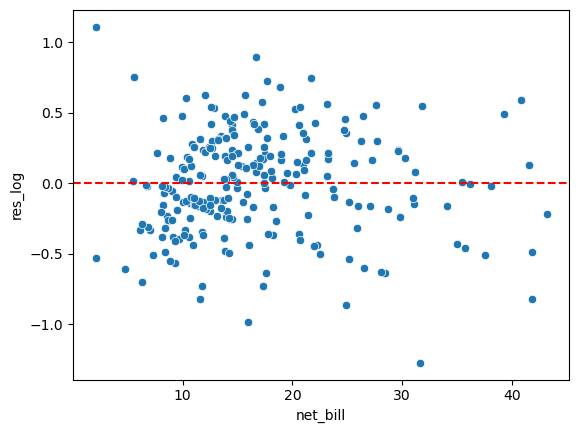

In [178]:
# Gráfico dos resíduos em função da variável 'net_bill'
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

Nota-se que a variância está mais uniforme neste gráfico quando comparado aos desenvolvidos no exercício I.

Vejamos se o log('tip') se adequa melhor ao log('net_bill') ou ao polinômio de 'net_bill'.

In [179]:
# Modelo log(tip) em função de 'smoker' e log('net_bill'), e seu resultados
log_xy = smf.ols('np.log(tip) ~ smoker + np.log(net_bill)', tips).fit()
log_xy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     56.57
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           7.20e-21
Time:                        18:34:44   Log-Likelihood:                -96.304
No. Observations:                 244   AIC:                             198.6
Df Residuals:                     241   BIC:                             209.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4054      0.138     -2.941      0.004      -0.677      -0.134
smoker[T.No]         0.0153      0.048      0.322      0.748      -0.079       0.109
np.log(net_bill)     0.5157      0.048     10.636      0.000       0.420       0.611
==============================================================================
Omnibus:                       13.271   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               29.908
Skew:                           0.159   Prob(JB):                     3.20e-07
Kurtosis:                       4.685   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A variável 'smoker' apresentou um valor de P>|t| muito grande no ajuste (0.748). Vamos removê-la do modelo.

In [180]:
# Ajuste do log('tip') em função de log('net_bill')
log_xy = smf.ols('np.log(tip) ~ np.log(net_bill)', tips).fit()
log_xy.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           5.62e-22
Time:                        18:34:44   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133     -2.961      0.003      -0.657      -0.132
np.log(net_bill)     0.5151      0.048     10.652      0.000       0.420       0.610
==============================================================================
Omnibus:                       12.633   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               28.054
Skew:                           0.141   Prob(JB):                     8.10e-07
Kurtosis:                       4.637   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O R² deste modelo foi bem superior ao inicial, implicando em melhor ajuste do que log('tip') em função de 'net_bill'.

Montando o gráfico de resíduos do modelo.

In [181]:
# Tomada dos resíduos
tips['res_log_xy'] = log_xy.resid

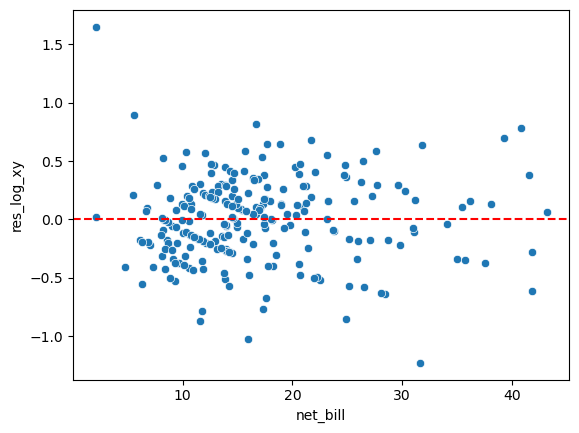

In [182]:
# Ajuste gráfico dos resíduos
sns.scatterplot(x = 'net_bill', y = 'res_log_xy', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

Não há diferenças significativas neste gráfico quando comparado ao anterior.

Desenvolvendo o ajuste de log('tip') em função do polinômio de 'net_bill'.

In [183]:
# Ajuste do modelo e seus resultados
log_pol = smf.ols('np.log(tip) ~ net_bill + np.power(net_bill,2)', tips).fit()
log_pol.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.332
Method:                 Least Squares   F-statistic:                     61.39
Date:                Fri, 02 Jun 2023   Prob (F-statistic):           2.82e-22
Time:                        18:34:44   Log-Likelihood:                -93.026
No. Observations:                 244   AIC:                             192.1
Df Residuals:                     241   BIC:                             202.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.1887      0.111      1.698      0.091      -0.030       0.408
net_bill                  0.0655      0.012      5.642      0.000       0.043       0.088
np.power(net_bill, 2)    -0.0008      0.000     -3.129      0.002      -0.001      -0.000
==============================================================================
Omnibus:                        5.692   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                7.934
Skew:                          -0.100   Prob(JB):                       0.0189
Kurtosis:                       3.860   Cond. No.                     2.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O R² deste modelo foi o maior entre os três desenvolvidos, desta forma, este tende a ser o melhor ajuste entre os três.

Verificando o gráfico de resíduos.

In [184]:
# Obtenção dos resíduos do ajuste
tips['res_log_pol'] = log_pol.resid

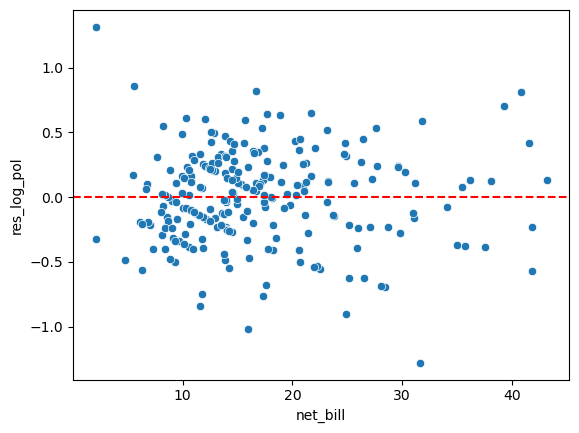

In [185]:
# Gráfico dos resíduos
sns.scatterplot(x = 'net_bill', y = 'res_log_pol', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

O gráfico obtido é mais compacto do que os outros dois. Entretanto, não são percebidas diferenças na distribuição dos resíduos.

Uma vez que não foram notadas diferenças entre os gráficos de resíduos, o único fator a ser analisado para determinar qual o melhor modelo é o valor do coeficiente de determinação de cada ajuste. Ao comparar os valores dos três ajustes, nota-se que o superior foi o do modelo polinomial, tornando este o melhor modelo entre os três.

Agora que foi determinado o melhor modelo deste exercício, vamos compará-lo com o melhor modelo do exercício anterior. Para isso, vamos tomar o expoente do logaritmo dos valores predizentes no modelo de log('tip') em função do polinômio de 'net_bill'.

In [186]:
tips['pred'] = np.exp(log_pol.fittedvalues)

tips[['pred', 'tip']].corr().iloc[0,1]**2

0.32908491114682004

Os resultados obtidos foram:

R² do modelo do exercício 1: 0.335

R² deste modelo: 0.330

O 1º modelo tem o maior (e melhor) coeficiente de determinação.

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

Carregamento da base 'previsao_de_renda.csv' e visualização dela.

In [187]:
previsao = pd.read_csv('previsao_de_renda.csv')
previsao.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


Há colunas que não deveriam estar presentes na base ('Unnamed: 0' e 'mau'). Vamos removê-las.

In [188]:
# Remoção de colunas extras:
previsao = previsao.drop(['Unnamed: 0', 'mau'], axis=1)

In [189]:
# Visualização da tabela:
previsao

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,1193.29
14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,2519.18
14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,1586.85
14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,6975.39


Antes de ajustar um modelo linear de 'renda' em função de 'tempo_emprego', verifiquemos o gráfico de distribuição dessas variáveis.

<AxesSubplot:xlabel='tempo_emprego', ylabel='renda'>

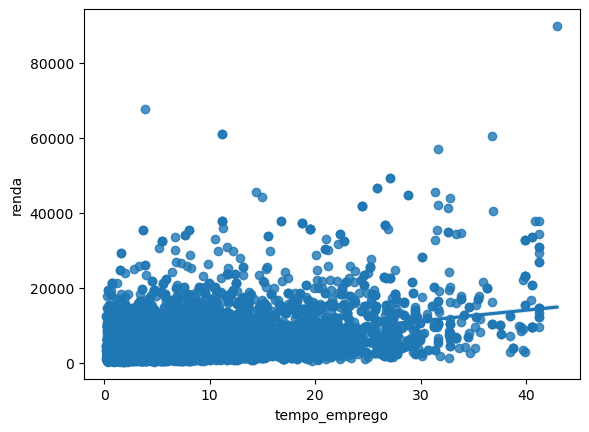

In [190]:
# Gráfico de distribuição de 'renda' em função de 'tempo_emprego'
sns.regplot(x='tempo_emprego', y='renda', data=previsao)

Há pontos muito distantes dos restantes na região renda > 50000. Para uma melhor análise, vamos remover estes pontos.

In [191]:
# Tabela com os dados em que 'renda' < 500000
prev = previsao[previsao['renda'] < 50000].copy()

Para que não hajam problemas na análise, vamos corrigir os índices da tabela:

In [192]:
# Correção dos índices da tabela com a remoção de algumas linhas
novo_indice = pd.Series([i for i in range(len(prev['renda']))])
prev.set_index(novo_indice)

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14989,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,1193.29
14990,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,2519.18
14991,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,1586.85
14992,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,6975.39


Verifica-se que foram removidas 6 linhas. Vejamos o novo gráfico de distribuições.

<AxesSubplot:xlabel='tempo_emprego', ylabel='renda'>

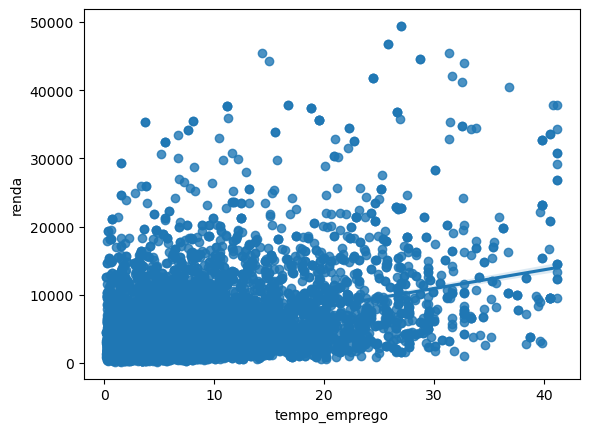

In [193]:
# Grpafico de distribuições de 'renda' em função de 'tempo_emprego'
sns.regplot(y='renda', x='tempo_emprego', data=prev)

Nota-se que há uma grande concentração de dados no intervalo 0 < 'tempo_emprego' < 30. Vamos realizar o ajuste linear.

In [194]:
# Ajuste linear simples de 'renda' em função de 'tempo_emprego'
fit_linear = smf.ols('renda ~ tempo_emprego', prev).fit()
fit_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     2324.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:34:46   Log-Likelihood:            -1.2191e+05
No. Observations:               12460   AIC:                         2.438e+05
Df Residuals:                   12458   BIC:                         2.438e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2697.4773     58.480     46.127      0.000    2582.848    2812.107
tempo_emprego   274.1823      5.687     48.210      0.000     263.034     285.330
==============================================================================
Omnibus:                     7948.843   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           118458.273
Skew:                           2.856   Prob(JB):                         0.00
Kurtosis:                      16.984   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

O coeficiente de determinação do ajuste está muito baixo (R² = 0.157) levando a considerar que a 'renda' do cliente não é, necessariamente, diretamente proporcional ao seu tempo de emprego. Vejamos se há alguma tendência no gráfico de resíduos do ajuste.

In [195]:
# Obtenção dos resíduos
prev['res_renda'] = fit_linear.resid

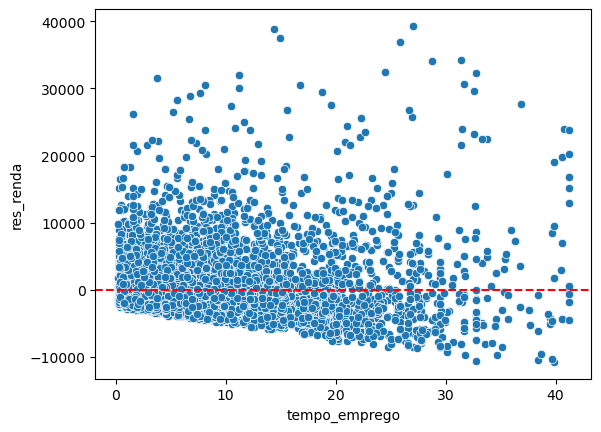

In [196]:
# Gráfico de resíduos
sns.scatterplot(x='tempo_emprego', y='res_renda', data=prev)
plt.axhline(y=0, color='r', linestyle='--')

O gráfico dos resíduos apresenta ma tendência a valores negativos com o aumento do tempo de emprego do cliente. Isto não é desejado. Para evitar isso, dado que os valores dos resíduos estão na ordem de 10000, vamos analisar o log('renda') em função do tempo de emprego.

In [197]:
# Ajuste do modelo log('renda') em função de 'tempo_emprego'
log_renda = smf.ols('np.log(renda) ~ tempo_emprego', prev).fit()
log_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     2072.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:34:46   Log-Likelihood:                -13926.
No. Observations:               12460   AIC:                         2.786e+04
Df Residuals:                   12458   BIC:                         2.787e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8084      0.010    775.071      0.000       7.789       7.828
tempo_emprego     0.0446      0.001     45.522      0.000       0.043       0.047
==============================================================================
Omnibus:                        0.959   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.951
Skew:                           0.021   Prob(JB):                        0.621
Kurtosis:                       3.004   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Agora que foram obtidos os resultados numéricos do ajuste, vejamos os gráficos de resíduos e de distribuição.

In [198]:
# Resíduos do ajuste
prev['res_log'] = log_renda.resid

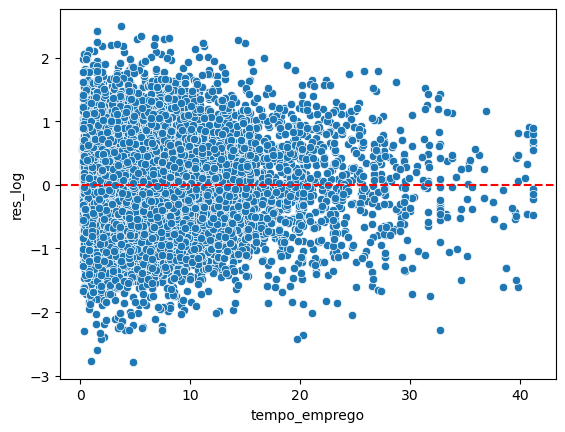

In [199]:
# Gráfico dos resíduos
sns.scatterplot(y='res_log', x='tempo_emprego', data=prev)
plt.axhline(y=0, color='r', linestyle='--')

Apesar da variância estar distribuída mais uniformemente neste gráfico ao compará-lo com o do ajuste linear, há uma tendência dos resíduos ficarem mais próximos de zero com o aumento do tempo de emprego, de forma que o gráfico tenha um formato cônico. Isto não era esperado.

In [200]:
# Obtenção dos valores preditos no ajuste
prev['log_renda'] = np.log(prev['renda'])

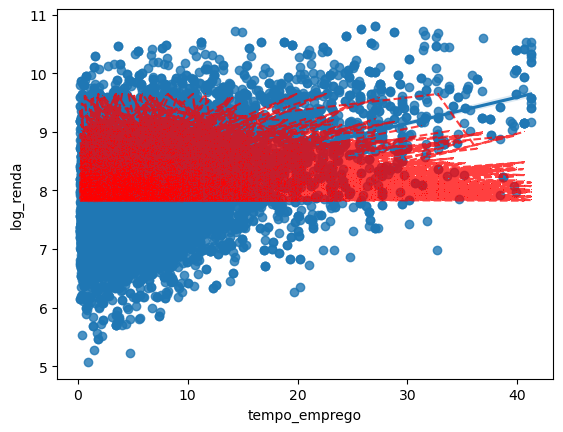

In [201]:
# Gráfico dos valores reais do log('renda') em função do tempo de emprego 
sns.regplot(x='tempo_emprego', y='log_renda', data=prev)

# Gráfico do valores preditos em função do tempo de emprego
pontos_log = log_renda.fittedvalues
len_log = len(log_renda.fittedvalues)
plt.plot(prev['tempo_emprego'].iloc[:len_log], pontos_log, 'r,--', alpha=0.75)

O gráfico dos valores preditos não apresentou a forma da função logaritmo tal como era esperado.

Comparendo os valores do R² deste ajuste com o linear.

In [202]:
# Expoente dos valores preditos do log('renda')
prev['pred'] = np.exp(log_renda.fittedvalues)

# R² do ajuste
prev[['pred', 'renda']].corr().iloc[0,1]**2

0.16618150489658481

Apesar do gráfico do ajuste não ser condizente com uma função logaritma, o R² deste modelo (0.166) foi superior ao do ajuste linear (0.157), sendo este mais condizente com os dados.

Agora, vejamos o caso da variável 'renda' em função de um polinômio do 'tempo_emprego'.

In [203]:
# Ajuste do modelo 'renda' em função do polinômio de 'tempo_emprego'
pol_renda = smf.ols('''renda ~ tempo_emprego +
                    np.power(tempo_emprego,2)
                    ''', data=prev).fit()
pol_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     1247.
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:34:48   Log-Likelihood:            -1.2184e+05
No. Observations:               12460   AIC:                         2.437e+05
Df Residuals:                   12457   BIC:                         2.437e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3330.4933     78.607     42.369      0.000    3176.411    3484.575
tempo_emprego                108.8424     14.928      7.291      0.000      79.581     138.104
np.power(tempo_emprego, 2)     6.1216      0.512     11.968      0.000       5.119       7.124
==============================================================================
Omnibus:                     7877.150   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           117065.285
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      16.916   Cond. No.                         466.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Este obteve maior coeficiente de determinação do que os outros dois modelos (0.166), apesar de ser muitíssimo próximo do ajuste logaritmico.

Vejamos os gráficos de resíduos e distribuição do modelo.

In [204]:
# Obtenção dos resíduos do ajuste polinomial
prev['res_pol'] = pol_renda.resid

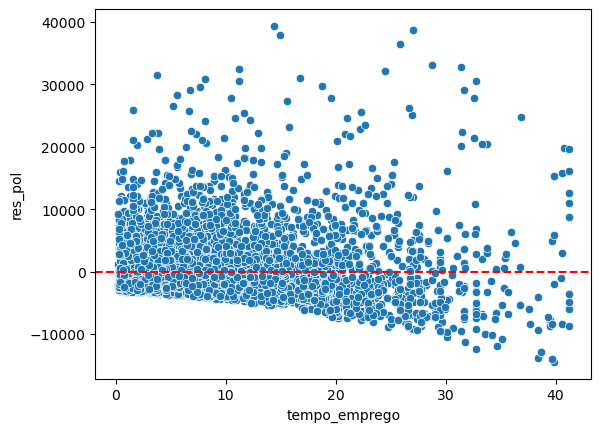

In [205]:
# Formação do gráfico de resíduos 
sns.scatterplot(x='tempo_emprego', y='res_pol', data=prev)
plt.axhline(y=0, color='r', linestyle='--')

O gráfico de resíduos obteve a mesma forma do ajuste linear, apresentando maior tendência de valores negativos para os resíduos com o aumento do tempo de emprego.

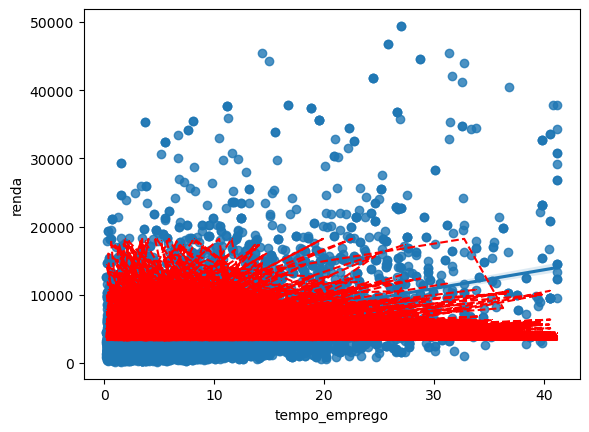

In [206]:
# Gráfico de distribuição dos valores 'renda' em função de 'tempo_emprego'
sns.regplot(x='tempo_emprego', y='renda', data=prev)

# Gráfico dos valores preditos do ajuste
pontos_pol = pol_renda.fittedvalues
len_pol = len(pol_renda.fittedvalues)
plt.plot(prev['tempo_emprego'].iloc[:len_pol], pontos_pol, 'r,--')

O ajuste polinomial se quer passou pelos pontos do gráfico. Dessa forma, apesar de ter o maior coeficiente de determinação dentre os três ajustes, este modelo está longe de ser adequado ao caso.

Como resultado da comparação entre os gráficos de resíduos, distribuição e coeficientes de determinação, vemos que o ajuste logaritmico é o mais adequando para uma regressão simples entre as variáveis 'renda' e 'tempo_emprego'.

Agora, vejamos uma regressão múltipla da variável 'renda' em função de todas as outras (com exceção das variáveis index, que identifica o cliente e data_ref, informando quando foi realizado o registro do cliente).

In [207]:
# Geração das matrizes de design e y
y_renda, X_renda = patsy.dmatrices('''renda ~ sexo + posse_de_veiculo +
                                   posse_de_imovel + qtd_filhos +
                                   tipo_renda + educacao + estado_civil +
                                   tipo_residencia + idade + tempo_emprego +
                                   qt_pessoas_residencia''', data=prev)

In [208]:
# Ajuste da regressão múltipla da variável 'renda' em função de todas as variáveis da tabela
mult_renda = sm.OLS(y_renda,X_renda).fit()
mult_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     150.3
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:34:50   Log-Likelihood:            -1.2139e+05
No. Observations:               12460   AIC:                         2.428e+05
Df Residuals:                   12435   BIC:                         2.430e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -128.5188   1603.710     -0.080      0.936   -3272.038    3015.000
sexo[T.M]                         2323.7945     84.391     27.536      0.000    2158.376    2489.213
posse_de_veiculo[T.True]           -62.0105     81.141     -0.764      0.445    -221.060      97.039
posse_de_imovel[T.True]            350.3800     79.902      4.385      0.000     193.759     507.001
tipo_renda[T.Bolsista]            -757.9865   2063.814     -0.367      0.713   -4803.382    3287.409
tipo_renda[T.Empresário]           948.4593     86.361     10.982      0.000     779.178    1117.741
tipo_renda[T.Pensionista]         1744.1002   1376.275      1.267      0.205    -953.612    4441.812
tipo_renda[T.Servidor público]     473.9076    124.981      3.792      0.000     228.925     718.890
educacao[T.Pós graduação]         2226.6825   1035.162      2.151      0.031     197.605    4255.760
educacao[T.Secundário]            -231.2526    419.200     -0.552      0.581   -1052.949     590.444
educacao[T.Superior completo]      336.2074    420.960      0.799      0.424    -488.939    1161.354
educacao[T.Superior incompleto]   -271.7008    450.981     -0.602      0.547   -1155.693     612.292
estado_civil[T.Separado]           165.1080    772.045      0.214      0.831   -1348.221    1678.437
estado_civil[T.Solteiro]           360.2335    757.859      0.475      0.635   -1125.288    1845.755
estado_civil[T.União]              -11.8919    137.654     -0.086      0.931    -281.716     257.932
estado_civil[T.Viúvo]              -26.5091    792.824     -0.033      0.973   -1580.567    1527.549
tipo_residencia[T.Casa]           -369.7259    314.669     -1.175      0.240    -986.526     247.074
tipo_residencia[T.Com os pais]    -652.3907    352.844     -1.849      0.064   -1344.020      39.238
tipo_residencia[T.Comunitário]    -580.1174    607.138     -0.955      0.339   -1770.202     609.967
tipo_residencia[T.Estúdio]        -939.5384    524.115     -1.793      0.073   -1966.884      87.807
tipo_residencia[T.Governamental]  -867.5134    380.407     -2.280      0.023   -1613.170    -121.857
qtd_filhos                        -216.6479    755.891     -0.287      0.774   -1698.311    1265.015
idade                               28.9376      4.605      6.284      0.000      19.911      37.964
tempo_emprego                      289.6324      5.891     49.164      0.000     278.085     301.180
qt_pessoas_residencia              288.0056    754.450      0.382      0.703   -1190.834    1766.845
==============================================================================
Omnibus:                     7976.944   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           129022.156
Skew:             

Os valores de P>|t| obtidos demonstram que as variáveis 'qt_pessoas_residencia', 'qtd_filhos' e 'estado_civil' não são significativas para o ajuste. Vamos removê-las do modelo.

In [209]:
# Remoção das variáveis não significativas do ajuste
y_renda, X_renda = patsy.dmatrices('''renda ~ sexo + posse_de_veiculo +
                                   posse_de_imovel + tipo_renda + 
                                   educacao + tipo_residencia + idade +
                                    tempo_emprego''', data=prev)

In [210]:
# Novo ajuste múltiplo
mult_renda = sm.OLS(y_renda,X_renda).fit()
mult_renda.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     200.2
Date:                Fri, 02 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:34:50   Log-Likelihood:            -1.2139e+05
No. Observations:               12460   AIC:                         2.428e+05
Df Residuals:                   12441   BIC:                         2.430e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          567.1266    544.110      1.042      0.297    -499.414    1633.667
sexo[T.M]                         2339.2965     83.833     27.904      0.000    2174.971    2503.622
posse_de_veiculo[T.True]           -55.7281     80.482     -0.692      0.489    -213.485     102.029
posse_de_imovel[T.True]            357.0282     79.713      4.479      0.000     200.779     513.277
tipo_renda[T.Bolsista]            -749.6715   2063.417     -0.363      0.716   -4794.288    3294.945
tipo_renda[T.Empresário]           948.9700     86.154     11.015      0.000     780.095    1117.845
tipo_renda[T.Pensionista]         1749.2438   1375.763      1.271      0.204    -947.464    4445.951
tipo_renda[T.Servidor público]     479.5604    124.859      3.841      0.000     234.817     724.304
educacao[T.Pós graduação]         2287.7914   1034.403      2.212      0.027     260.201    4315.382
educacao[T.Secundário]            -211.4910    418.784     -0.505      0.614   -1032.373     609.391
educacao[T.Superior completo]      353.3169    420.455      0.840      0.401    -470.841    1177.474
educacao[T.Superior incompleto]   -253.4410    450.519     -0.563      0.574   -1136.528     629.646
tipo_residencia[T.Casa]           -368.9410    314.270     -1.174      0.240    -984.958     247.076
tipo_residencia[T.Com os pais]    -658.6598    352.577     -1.868      0.062   -1349.766      32.446
tipo_residencia[T.Comunitário]    -605.4182    606.854     -0.998      0.318   -1794.946     584.110
tipo_residencia[T.Estúdio]        -921.9253    523.592     -1.761      0.078   -1948.246     104.395
tipo_residencia[T.Governamental]  -862.1491    380.166     -2.268      0.023   -1607.333    -116.965
idade                               25.8235      4.322      5.975      0.000      17.352      34.295
tempo_emprego                      290.2242      5.881     49.349      0.000     278.696     301.752
==============================================================================
Omnibus:                     7970.251   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           128574.940
Skew:                           2.835   Prob(JB):                         0.00
Kurtosis:                      17.681   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O coeficiente de determinação do ajuste mostrou-se superior ao ajuste linear entre 'renda' e 'tempo_emprego'. Além disso, no caso analisado, as variáveis em questão são 'sexo' (onde é 1 se o cliente tem sexo masculino, 0, no caso feminino), 'posse_de_veiculo' (1 se o cliente tem, 0 caso contrário), 'posse_de_imovel' (1 se o cliente tem, 0 caso contrário), 'tipo_renda' (divida em 'Bolsista', 'Empresário', 'Pensionista' e 'Servidor Público'), 'educacao' (podendo ser 'Pós graduação', 'Secundário', 'Superior completo' e 'Superior incompleto'), 'tipo_residencia' (sendo 'Casa', 'Com os pais', 'Comunitário', 'Estúdio' ou 'Governamental') e 'idade'.

Com a remoção das variáveis não significativas, analisemos os resíduos do ajuste.

Para que não hajam problemas na formação dos gráficos de resíduos, tomemos a mesma quantidade de dados na tabela da que foi ajustada. 

In [211]:
# Nova tabela com a mesma quantidade de dados dos que foram ajustados
prev2 = prev.iloc[:len(mult_renda.resid)].copy()

In [212]:
# Tomada dos resíduos do ajuste múltiplo
prev2['res_mult'] = mult_renda.resid

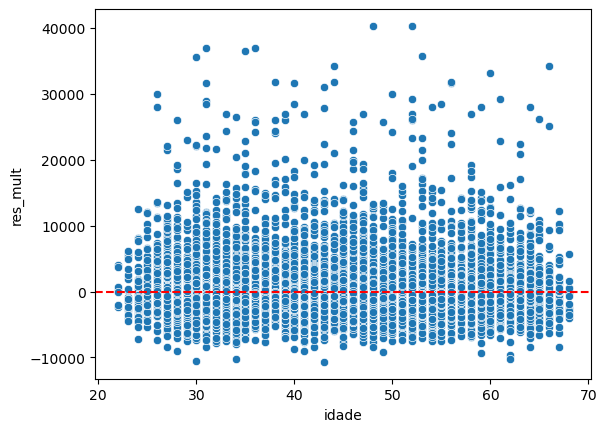

In [213]:
# Gráfico de resíduos do ajuste em função da idade do cliente
sns.scatterplot(x='idade', y='res_mult', data=prev2)
plt.axhline(y=0, color='r', linestyle='--')

Apesar de haver uma concentração de resíduos levemente maior na região positiva do gráfico, não vemos um padrão evidente neste gráfico de resíduos. Além disso, há uma independência entre os resíduos e a idade do cliente, de forma que este gráfico se comporte como o ideal.

<AxesSubplot:xlabel='sexo', ylabel='res_mult'>

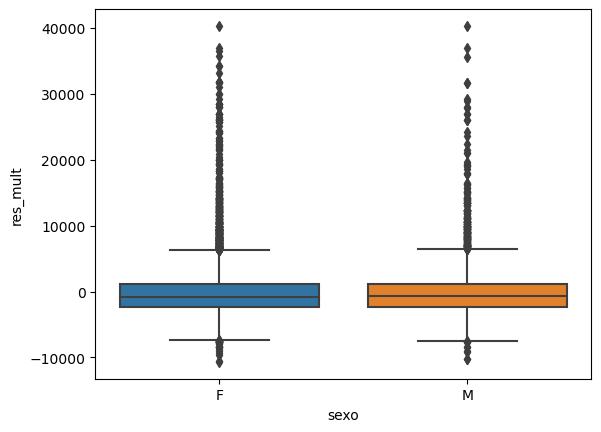

In [214]:
# Gráfico de resíduos do ajuste múltiplo em função do sexo do cliente
sns.boxplot(x = 'sexo', y = 'res_mult', data = prev2)

Não são percebidas diferenças das distribuções de resíduos entre os sexos dos clientes. 

<AxesSubplot:xlabel='posse_de_veiculo', ylabel='res_mult'>

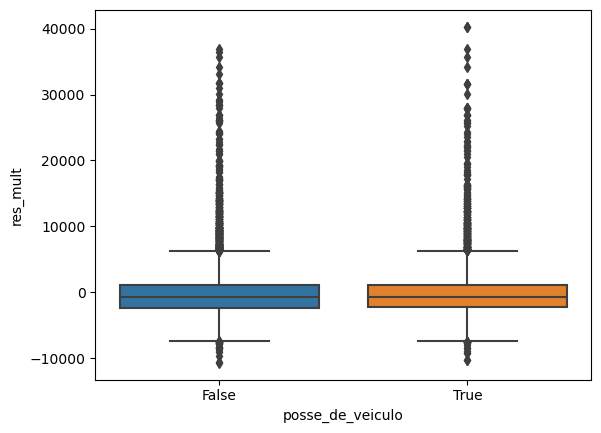

In [215]:
# Gráfico de resíduos do ajuste múltiplo em função do posse de veículos
sns.boxplot(x = 'posse_de_veiculo', y = 'res_mult', data = prev2)

Não são percebidas diferenças das distribuções de resíduos entre o fato do cliente ter ou não um veículo. 

<AxesSubplot:xlabel='posse_de_imovel', ylabel='res_mult'>

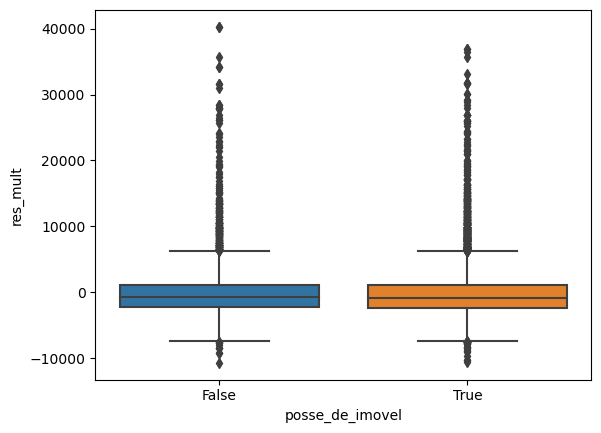

In [216]:
# Gráfico de resíduos do ajuste múltiplo em função da posse de imóvel
sns.boxplot(x = 'posse_de_imovel', y = 'res_mult', data = prev2)

Não são percebidas diferenças das distribuções de resíduos entre o fato do cliente ter ou não um imóvel. 

<AxesSubplot:xlabel='tipo_renda', ylabel='res_mult'>

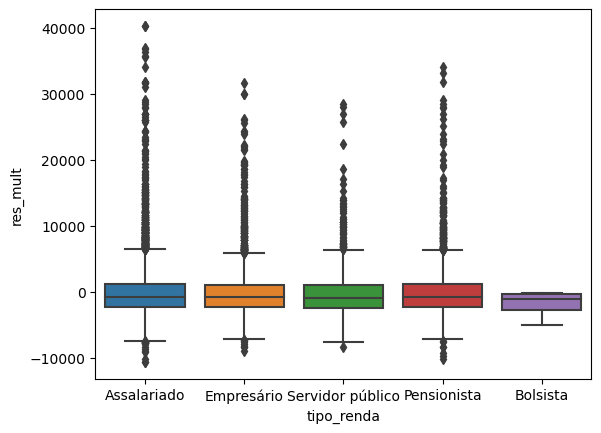

In [217]:
# Gráfico de resíduos do ajuste múltiplo em função do tipo de renda
sns.boxplot(x = 'tipo_renda', y = 'res_mult', data = prev2)

Não são percebidas diferenças das distribuções de resíduos entre os tipos de renda dos clientes. 

[Text(0, 0, 'Secundário'),
 Text(1, 0, 'Superior completo'),
 Text(2, 0, 'Superior incompleto'),
 Text(3, 0, 'Primário'),
 Text(4, 0, 'Pós graduação')]

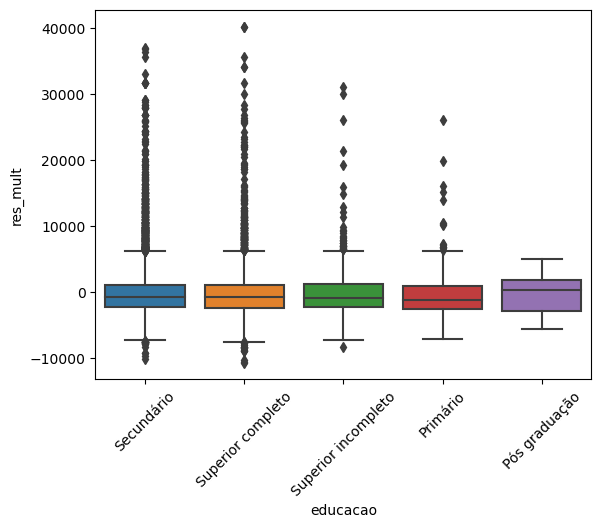

In [218]:
# Gráfico de resíduos do ajuste múltiplo em função do nível de educação
escolaridade = sns.boxplot(x = 'educacao', y = 'res_mult', data = prev2)
escolaridade.set_xticklabels(escolaridade.get_xticklabels(), rotation=45)

Não são percebidas diferenças das distribuções de resíduos entre os níveis de escolaridade dos clientes. 

[Text(0, 0, 'Casa'),
 Text(1, 0, 'Com os pais'),
 Text(2, 0, 'Aluguel'),
 Text(3, 0, 'Governamental'),
 Text(4, 0, 'Estúdio'),
 Text(5, 0, 'Comunitário')]

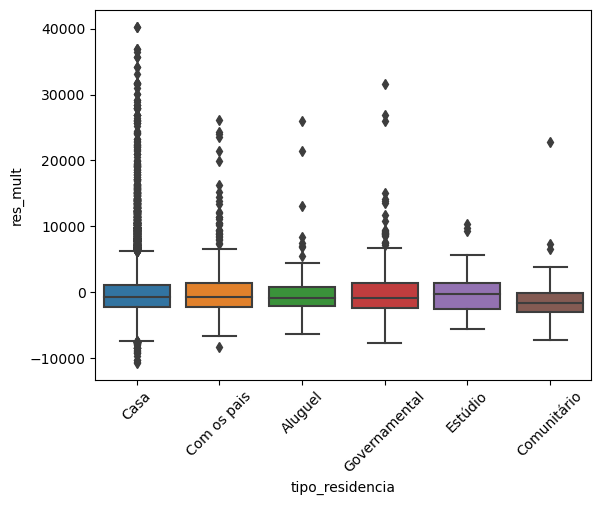

In [219]:
# Gráfico de resíduos do ajuste múltiplo em função do tipo de residência
residencia = sns.boxplot(x = 'tipo_residencia', y = 'res_mult', data = prev2)
residencia.set_xticklabels(residencia.get_xticklabels(), rotation=45)

Não são percebidas diferenças das distribuções de resíduos entre os tipos de residências. 

O caso da variável 'tempo_emprego' já foi investigado anteriormente. 

Uma vez que não foram notadas discrepâncias entre os resíduos de cada variável qualitativa, podemos dizer que este ajuste múltiplo foi um bom modelo para análise.